# This notebook is for course four : Classification Analysis (Supervised Learning)

### Importing Data Files

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import Product DataSet here
product_data = pd.read_csv('../Student Files/Product Data Set - Student 2 of 3.csv', sep = '|')
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [3]:
#Import Transaction DataSet Here
transaction_data = pd.read_csv('../Student Files/Transaction Data Set - Student 3 of 3.csv', sep = '|')
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [4]:
#Import Customer Dataset Here
customer_data = pd.read_csv('../Student Files/Customer Data Set - Student 1 of 3.csv')
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


### Changing Data Types

In [5]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [6]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [7]:
trans_products=transaction_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')

In [8]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [9]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [10]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [11]:
customer_prod_categ=customer_prod_categ.reset_index()

In [12]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')

In [13]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})
trans_total_spend.head()

,TOTAL SPENT
CUSTOMER NUM,
10001,6826.770
10002,5062.451
10003,8562.440
10004,5522.694
10005,213.512


In [14]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
CUSTOMER NUM,,,,,
10001,4022.430,1601.315,68.688,1134.337,6826.770
10002,2312.509,2473.163,276.779,NaN,5062.451
10003,2887.382,5414.418,260.640,NaN,8562.440
10004,3637.213,1840.211,45.270,NaN,5522.694
10005,213.512,NaN,NaN,NaN,213.512


In [15]:
customer_KPIs=customer_KPIs.fillna(0)


In [16]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [17]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single,4022.430,1601.315,68.688,1134.337,6826.770
1,10002,0,42,94475,9,notenrolled,NaN,6,Married,2312.509,2473.163,276.779,0.000,5062.451
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married,2887.382,5414.418,260.640,0.000,8562.440
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single,3637.213,1840.211,45.270,0.000,5522.694
4,10005,0,30,51498,3,notenrolled,NaN,1,Single,213.512,0.000,0.000,0.000,213.512


# Classification 

We want to predict loyalty group as our target variable. From our data understanding and preparation we saw that the factors affecting loyalty are income, experience, age and total spent

In [18]:
# create a pandas dataframe with the most relevant features.
DF_classification = customer_all_view[['INCOME', 'AGE', 'EXPERIENCE SCORE', 'TOTAL SPENT', 'LOYALTY GROUP']]
DF_classification.head()


,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT,LOYALTY GROUP
0,133498,64,5,6826.770,enrolled
1,94475,42,9,5062.451,notenrolled
2,88610,40,9,8562.440,enrolled
3,84313,38,8,5522.694,enrolled
4,51498,30,3,213.512,notenrolled


In [19]:
# separate the input features from the target feature and put the target feature in a dataframe
target_feature = pd.DataFrame(DF_classification['LOYALTY GROUP'])
target_feature.head()

,LOYALTY GROUP
0,enrolled
1,notenrolled
2,enrolled
3,enrolled
4,notenrolled


In [20]:
# drop the loyalty group column from the dataframe with input features
DF_classification = DF_classification.drop(['LOYALTY GROUP'],axis = 1)
DF_classification.head()

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT
0,133498,64,5,6826.770
1,94475,42,9,5062.451
2,88610,40,9,8562.440
3,84313,38,8,5522.694
4,51498,30,3,213.512


In [21]:
# DF_classification is ready for scaling we'll use the min-max scaling approach
# import the preprocessing library
from sklearn import preprocessing

In [22]:
'''
save the column names of the DF_classification dataframe in a list before scaling. We do this because after 
applying the preprocessor to a pandas dataframe the result is a numpy array and the column names are lost. To 
reconstruct the dataframe after scaling you will need the column names.
'''
DF_classification_column_names = DF_classification.columns.values
DF_classification_column_names

array(['INCOME', 'AGE', 'EXPERIENCE SCORE', 'TOTAL SPENT'], dtype=object)

In [23]:
DF_classification = preprocessing.minmax_scale(DF_classification)
DF_classification

array([[0.8728178 , 0.63888889, 0.44444444, 0.44653193],
       [0.57204628, 0.33333333, 0.88888889, 0.33079041],
       [0.52684153, 0.30555556, 0.88888889, 0.56039405],
       ...,
       [0.59422859, 0.33333333, 0.77777778, 0.40879128],
       [0.1092005 , 0.05555556, 0.        , 0.        ],
       [0.4228205 , 0.22222222, 0.88888889, 0.27303383]])

In [24]:
# after scaling we can see that all values are between 0 and 1 meaning no value will dominate the others.
DF_classification = pd.DataFrame(DF_classification, columns = DF_classification_column_names)
DF_classification[100:110]

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT
100,0.033227,0.027778,0.888889,0.004519
101,0.127460,0.083333,0.666667,0.206514
102,0.244499,0.166667,0.666667,0.407482
103,0.024510,0.013889,1.000000,0.049162
104,0.357884,0.208333,0.777778,0.358286
105,0.629175,0.361111,0.444444,0.659597
106,0.758145,0.472222,0.666667,0.597527
107,0.180418,0.125000,0.777778,0.057267
108,0.441103,0.250000,0.555556,0.496993
109,0.245416,0.166667,0.000000,0.188169


In [25]:
# then now you can merge the scaled data and the target feature which is loyalty
DF_classification = pd.concat([DF_classification, target_feature],axis = 1)
DF_classification.head()

,INCOME,AGE,EXPERIENCE SCORE,TOTAL SPENT,LOYALTY GROUP
0,0.872818,0.638889,0.444444,0.446532,enrolled
1,0.572046,0.333333,0.888889,0.330790,notenrolled
2,0.526842,0.305556,0.888889,0.560394,enrolled
3,0.493722,0.277778,0.777778,0.360983,enrolled
4,0.240799,0.166667,0.222222,0.012694,notenrolled


## Partitioning data into training and testing splits

In [26]:
# import train test split
from sklearn.model_selection import train_test_split

In [27]:
'''
run the following code to generate training and testing datasets. Training will be 80% and testing 20%. This code 
will divide the dataframe into 2 mutually exclusive data frames, X_train and X_test. It also separates the target 
feature into 2 dataframes Y_train and Y_test
'''
X_train,X_test,Y_train,Y_test = \
train_test_split(DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']],DF_classification['LOYALTY GROUP'], test_size=0.2,random_state=42)

# test_size = 0.2 i.e. 20%  random state = n, shuffle n times, n should be 0 <= n <= 42.

We removed AGE from the list of features because it is highly correlated to income. 

random_state is a pseudo random number generator used for random sampling when splitting the input data. If this number is set then each time you run you get the same training and testing data splits. If it's not specified you get different data sets each time. 

In [28]:
X_train.head()

,EXPERIENCE SCORE,TOTAL SPENT,INCOME
249,0.888889,0.070731,0.027007
433,0.888889,0.167675,0.177782
19,1.000000,0.281217,0.306051
322,0.666667,0.172407,0.131737
332,0.777778,0.075750,0.135545


In [29]:
Y_train.head()

249       enrolled
433       enrolled
19     notenrolled
322       enrolled
332       enrolled
Name: LOYALTY GROUP, dtype: object

In [30]:
X_test.head()

,EXPERIENCE SCORE,TOTAL SPENT,INCOME
361,1.000000,0.474607,0.564878
73,0.777778,0.403350,0.355927
374,0.888889,0.336084,0.377385
155,0.555556,0.549815,0.633221
104,0.777778,0.358286,0.357884


In [31]:
Y_test.head()

361       enrolled
73        enrolled
374    notenrolled
155    notenrolled
104       enrolled
Name: LOYALTY GROUP, dtype: object

Text(0, 0.5, 'Income')

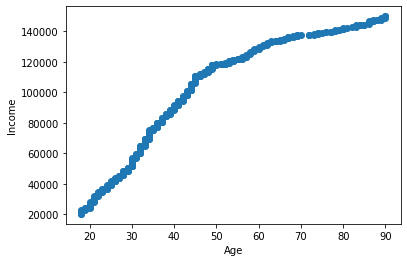

In [32]:
# verify the relationship between age and income:
import matplotlib.pyplot as plt
plt.scatter(customer_all_view['AGE'], customer_all_view['INCOME'])
plt.xlabel('Age')
plt.ylabel('Income')

Highly correlated features do not improve the model performance because one variable is redundant with the other one, so removing it does not affect the classification and instead increases speed of the algorithm.

### Training and testing using KNN and Decision Trees

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
# create an instance of the KNN classifier. As an initial setting we'll use k = 8. We'll get optimal k later using cross-validation
clf_KNN = KNeighborsClassifier(n_neighbors = 8)

In [35]:
clf_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Algorithm: This is the method or the algorithm that is used to calculate the nearest neighbors. It is set to auto, which means that the KNN attempts to decide the most appropriate algorithm based on the values that are passed to the fit method. The fit method is explained soon.


Leaf size: This parameter specifies the number of points that are used to calculate the nearest neighbor points. It can significantly impact the speed of the calculations and the memory that is required.


Metric: The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.


Weights: The weight function that is used in prediction. Uniform weights mean that all points in each neighborhood are weighted equally.


For more information about the parameters, see http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

In [96]:
clf_KNN.fit(X_train, np.ravel(Y_train))
# np.ravel = returns a contiguous flattened array

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [37]:
# to test the model, first use the model to predict the labels of the testing feature set
predicted = clf_KNN.predict(X_test)

In [38]:
predicted

array(['enrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'enrolled', 'notenrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'notenrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'notenrolled', 'notenrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'notenr

In [39]:
# compare the predicted to the actual values
from sklearn import metrics

In [40]:
# We're using Y_test because Y is the target variable which is what we're predicting hence we compare results to what exists.
acc = metrics.accuracy_score(Y_test, predicted)
print('accuracy = ' + str(acc*100) + "%")
print(metrics.classification_report(Y_test,predicted))

accuracy = 79.0%
              precision    recall  f1-score   support

    enrolled       0.73      0.92      0.82        51
 notenrolled       0.89      0.65      0.75        49

    accuracy                           0.79       100
   macro avg       0.81      0.79      0.79       100
weighted avg       0.81      0.79      0.79       100



precision = when a model predicts yes how often is it correct?

recall/sensitivity = how many times the model correctly predicts yes. 

**The output shows the following information:**
An overall accuracy of 79% means that the model was able to predict correctly the labels of 79% of the input testing data set.


Each class label (enrolled or not enrolled) is treated separately as follows: (Hint: Remember the confusion matrix.)


Enrolled:

It has a precision of 73%, which means that the whenever the model predicts or outputs “enrolled”, you can trust 
it by 73%.

It has a recall of 92%, which means that whenever the true label of an unknown input sample is “enrolled”, the model can predict it correctly by 92%.

It has an f1-score of 82%, which is a weighted sum of the precision and recall.


Not enrolled:

It has a precision of 89%, which means that the whenever the model predicts “not enrolled”, you can trust it by 89%.

It has a recall of 65%, which means that whenever the true label of an unknown input sample is “not enrolled”, the model can predict it correctly by 65%.

It has an f1-score of 75%, which is a weighted sum of the precision and recall.

Support is the actual number of class labels.

### Training a Decision Tree Classifier

In [41]:
# Import the decision trees algorithm library
from sklearn.tree import DecisionTreeClassifier

In [42]:
# Create an instance of the algorithm with criterion = entropy
# Entropy is defined as a measure to define a degree of impurity in a system. If the sample is homogeneous, then the entropy is zero
clf_Tree=DecisionTreeClassifier(criterion="entropy", random_state = 0)
clf_Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

We set the criterion = “entropy”. Entropy is the algorithm that the decision trees use to split nodes. For more information about the other model parameters, see http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.

In [43]:
# train and test the tree model
clf_Tree.fit(X_train, Y_train)
predicted = clf_Tree .predict(X_test)
acc = metrics.accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(Y_test,predicted))

accuracy = 75.0%
              precision    recall  f1-score   support

    enrolled       0.74      0.78      0.76        51
 notenrolled       0.76      0.71      0.74        49

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



As you can see, the accuracy of the decision tree model is less than that of the KNN model. However, do not rule out decision trees until you have fully tested both models with different testing splits, and then compare both models’ performance.

**Question: Can you analyze the output metrics of the decision tree's model?**

The decision tree model has an accuracy of 75%. 

**Enrolled:** When the model predicts 'enrolled' it can be trusted by 74%. And out of all predictions that said 'enrolled', 78% were correct.

**Not Enrolled:** When the model predicts 'not enrolled', it can be trusted 76%, and out of all the 'not enrolled' predictions, 71% were correct.

In [44]:
'''
Decision trees have an advantage over KNN in that they provide numerical values for the feature importance. 
You can use this feature to provide Retailer X with the most important factors that affect loyalty program 
participation among customers. Use the feature_importances_ method to get the feature importance The higher 
the value the more important the feature. Our features were: ['EXPERIENCE SCORE','TOTAL SPENT','INCOME']
'''
clf_Tree.feature_importances_

array([0.26796289, 0.39545388, 0.33658323])

We create one train test split for each classifier to assess the model performance, which means that we tested only model performance on one unseen data set. To obtain an insight about how the model generalizes to more independent data sets, use cross-validation.

In the KNN model, we assumed K=8 even though this value might not be the optimum one. To obtain an optimum value, iterate over a defined set of values of K, such as K=1,2,3,4….10 and get the optimum value.

### Training and testing the model using k-fold cross-validation

In [45]:
# Import the KFold library
from sklearn.model_selection import KFold

In [46]:
# Define a new generic training and testing function with accuracy as the performance metric
def Training_Testing_Accuracy_Only(model,train_data,train_labels,test_data,test_labels):
    model.fit(train_data,train_labels)
    predicted = model.predict(test_data)
    acc = metrics.accuracy_score(test_labels,predicted)
    print ('accuracy = '+str(acc*100)+'%')
    return(acc)

The code performs the following functions:

It has five arguments as inputs: The classifier model (model), the training data (train_data), the training labels (train_labels), testing data (test_data), and testing labels (test_labels).

It trains the model by using the function “.fit()”.

It predicts the class labels of the testing feature set and saves them to a list called “predicted”.

It compares the predicted output with the actual labels (“test_labels”) and calculates the accuracy (“acc”) by using a function that is called “metrics.accuracy_score()”. Then, it prints the output and returns the accuracy.

In [47]:
# Set the number of folds Each iteration has 450 training samples and 50 testing samples
kf = KFold(n_splits=10)

## Training and testing the decision tree model by using 10-fold cross-validation

In [48]:
# Declare an empty list to store the accuracy in each iteration and declare a new decision Tree classifier
clf_Tree=DecisionTreeClassifier(criterion='entropy')
accuracy_list=[]

In [49]:
# Train and test the decision tree model for each fold and get the overall accuracy
for train_index, test_index in kf.split(DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]):
    X=DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]
    Y=DF_classification['LOYALTY GROUP']
    X_train,X_test=X.iloc[train_index], X.iloc[test_index]
    Y_train,Y_test=Y.iloc[train_index], Y.iloc[test_index]   
    accuracy=Training_Testing_Accuracy_Only(clf_Tree,X_train,Y_train,X_test,Y_test)
    accuracy_list.append(accuracy) 
print("overall_accuracy is %",100 * sum(accuracy_list)/len(accuracy_list))

accuracy = 76.0%
accuracy = 78.0%
accuracy = 74.0%
accuracy = 72.0%
accuracy = 70.0%
accuracy = 82.0%
accuracy = 70.0%
accuracy = 74.0%
accuracy = 72.0%
accuracy = 78.0%
overall_accuracy is % 74.60000000000001


**for train_index, test_index in kf.split(DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]):**

This line of code is a for loop that takes its input from the Pandas data frame that contains the most important features.

The data frame has 500 rows. Each row represents a customer. In each iteration, the function kf.split() creates the following 2 NumPy arrays:

train_index has 450 indexes for training.
test_index has 50 indexes for testing.
Each index points to a row in the DF_classification Pandas data frame. In each iteration, these indexes are changed in the same manner as explained in the section "K-fold cross-validation".
**X=DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]**

This line creates a new Pandas data frame X with only the input features from the DF_classification Pandas data frame.

**Y=DF_classification['LOYALTY GROUP']**

This line creates a new Pandas data frame “Y” with only the target feature.

**X_train,X_test=X.iloc[train_index], X.iloc[test_index]**

The function “iloc[ ]” takes an index number as an argument and returns the corresponding value (row) to that index in a Pandas data frame.

Therefore, the whole line of code, returns two Pandas data frames with the values (rows) corresponding to these indexes in the X data frame.

**Y_train,Y_test=Y.iloc[train_index], Y.iloc[test_index]**

This line returns the values for the output labels for the training and testing sets.

**accuracy=Training_Testing_Accuracy_Only(clf_Tree,X_train,Y_train,X_test,Y_test)**

This line uses the custom function that we defined before to train and test the model and returns the accuracy of each K fold.

**accuracy_list.append(accuracy)**

This line appends the accuracy that is calculated in each iteration to accuracy_list. This function is used to calculate the overall accuracy of all K folds.

### Training and testing the K-Nearest Neighbor classifier with a 10-fold cross-validation and finding the optimum K_neighbors


In [50]:
# Declare an empty list to store the accuracy for each iteration of K_neighbors
accuracy_list_for_each_K_neighbours=[]

In [51]:
# Train and test the KNN classifier by using two loops: An outer loop to iterate over the values of K neighbors 1 - 10 and an inner loop for training and testing the model by using cross-validation

for k_neighbours in range(1,15):
    clf_NN = KNeighborsClassifier(n_neighbors=k_neighbours)
    accuracy_list_k_fold = []
    for train_index, test_index in kf.split(DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]):
        X=DF_classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME']]
        Y=DF_classification['LOYALTY GROUP']
        X_train,X_test=X.iloc[train_index], X.iloc[test_index]
        Y_train,Y_test=Y.iloc[train_index], Y.iloc[test_index]    
        accuracy=Training_Testing_Accuracy_Only(clf_NN,X_train,Y_train,X_test,Y_test)
        accuracy_list_k_fold.append(accuracy)
    accuracy_list_for_each_K_neighbours.append(100 * sum(accuracy_list_k_fold)/len(accuracy_list_k_fold))
    print("Overall Accuracy for K_neighbours=",k_neighbours,"is",accuracy_list_for_each_K_neighbours[k_neighbours-1])

accuracy = 64.0%
accuracy = 64.0%
accuracy = 66.0%
accuracy = 64.0%
accuracy = 82.0%
accuracy = 68.0%
accuracy = 70.0%
accuracy = 64.0%
accuracy = 76.0%
accuracy = 68.0%
Overall Accuracy for K_neighbours= 1 is 68.6
accuracy = 74.0%
accuracy = 60.0%
accuracy = 72.0%
accuracy = 74.0%
accuracy = 74.0%
accuracy = 78.0%
accuracy = 70.0%
accuracy = 72.0%
accuracy = 82.0%
accuracy = 76.0%
Overall Accuracy for K_neighbours= 2 is 73.2
accuracy = 72.0%
accuracy = 64.0%
accuracy = 68.0%
accuracy = 70.0%
accuracy = 78.0%
accuracy = 78.0%
accuracy = 70.0%
accuracy = 70.0%
accuracy = 76.0%
accuracy = 76.0%
Overall Accuracy for K_neighbours= 3 is 72.20000000000002
accuracy = 82.0%
accuracy = 66.0%
accuracy = 72.0%
accuracy = 74.0%
accuracy = 80.0%
accuracy = 82.0%
accuracy = 70.0%
accuracy = 76.0%
accuracy = 78.0%
accuracy = 78.0%
Overall Accuracy for K_neighbours= 4 is 75.80000000000001
accuracy = 78.0%
accuracy = 64.0%
accuracy = 80.0%
accuracy = 74.0%
accuracy = 80.0%
accuracy = 76.0%
accuracy = 7

**clf_NN = KNeighborsClassifier(n_neighbors=k_neighbours)**

This line defines a new KNN classifier in each iteration with a different value of K_neighbours.

**accuracy_list_k_fold = []**

This line defines an empty list to store the accuracy that is calculated for each fold.

**accuracy_list_k_fold.append(accuracy)**

This line appends the accuracy of each fold to accuracy_list_k_fold. This list is used later to calculate the overall accuracy of all K folds for a specific value of k_neighbours.

**accuracy_list_for_each_K_neighbours.append(100 * sum(accuracy_list_k_fold)/len(accuracy_list_k_fold))**

This line appends the overall accuracy of the model for a specific value of k_neighbours. The maximum accuracy in that list corresponds to the optimal number of neighbors (optimum k_neighbours).

**print("Overall Accuracy for K_neighbours=",k_neighbours,"is",accuracy_list_for_each_K_neighbours[k_neighbours-1])**

This line prints the values of accuracy_list_for_each_K_neighbours against each value of k_neighbours. From the following output, we can conclude that the optimum value for k_neighbours is 10:

In [52]:
# identifying the optimum K from plotting the accuracy list
from matplotlib import pyplot as plt

Text(0, 0.5, '10 k-Fold Accuracy')

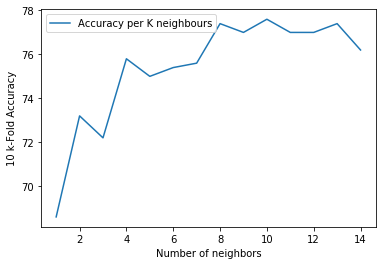

In [53]:
plt.plot(range(1,15),accuracy_list_for_each_K_neighbours)
plt.legend(['Accuracy per K neighbours'], loc='upper left')
plt.xlabel("Number of neighbors")
plt.ylabel("10 k-Fold Accuracy")

### Exercise
To practice what you have learned in this course, complete the following steps:
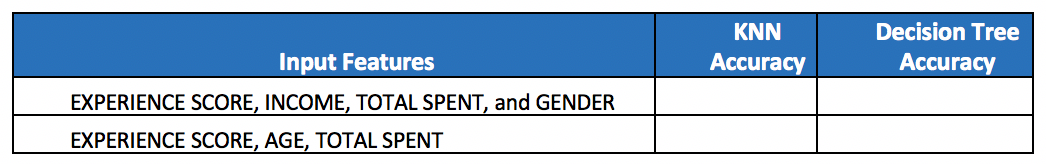

Compare the accuracy that you obtained in each case with the accuracy that you got by using the most relevant features (EXPERIENCE SCORE, INCOME, and TOTAL SPENT).

## KNN accuracy with [experience, income, total spent and gender]

In [54]:
DF2_Classification = customer_all_view[['EXPERIENCE SCORE','TOTAL SPENT','INCOME', 'GENDER', 'LOYALTY GROUP']]
DF2_Classification.head()

,EXPERIENCE SCORE,TOTAL SPENT,INCOME,GENDER,LOYALTY GROUP
0,5,6826.770,133498,0,enrolled
1,9,5062.451,94475,0,notenrolled
2,9,8562.440,88610,0,enrolled
3,8,5522.694,84313,0,enrolled
4,3,213.512,51498,0,notenrolled


In [55]:
target_feature2 = pd.DataFrame(DF2_Classification['LOYALTY GROUP'])

In [56]:
DF2_Classification = DF2_Classification.drop(['LOYALTY GROUP'],axis = 1)

In [57]:
DF2_column_names = DF2_Classification.columns.values
DF2_column_names

array(['EXPERIENCE SCORE', 'TOTAL SPENT', 'INCOME', 'GENDER'],
      dtype=object)

In [58]:
DF2_Classification = preprocessing.minmax_scale(DF2_Classification)
DF2_Classification

array([[0.44444444, 0.44653193, 0.8728178 , 0.        ],
       [0.88888889, 0.33079041, 0.57204628, 0.        ],
       [0.88888889, 0.56039405, 0.52684153, 0.        ],
       ...,
       [0.77777778, 0.40879128, 0.59422859, 0.        ],
       [0.        , 0.        , 0.1092005 , 1.        ],
       [0.88888889, 0.27303383, 0.4228205 , 1.        ]])

In [59]:
DF2_Classification = pd.DataFrame(DF2_Classification, columns= DF2_column_names)
DF2_Classification = pd.concat([DF2_Classification, target_feature2], axis = 1)
DF2_Classification.head()

,EXPERIENCE SCORE,TOTAL SPENT,INCOME,GENDER,LOYALTY GROUP
0,0.444444,0.446532,0.872818,0.0,enrolled
1,0.888889,0.330790,0.572046,0.0,notenrolled
2,0.888889,0.560394,0.526842,0.0,enrolled
3,0.777778,0.360983,0.493722,0.0,enrolled
4,0.222222,0.012694,0.240799,0.0,notenrolled


In [60]:
X_train,X_test,Y_train,Y_test = \
train_test_split(DF2_Classification[['EXPERIENCE SCORE','TOTAL SPENT','INCOME', 'GENDER']],DF2_Classification['LOYALTY GROUP'], test_size=0.2,random_state=42)

In [61]:
# I will use 10 because it was optimal in the test above
clf2_KNN = KNeighborsClassifier(n_neighbors= 10)

In [62]:
clf2_KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [63]:
predicted = clf2_KNN.predict(X_test)

In [64]:
predicted

array(['enrolled', 'enrolled', 'notenrolled', 'enrolled', 'notenrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'enrolled', 'enrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'notenrolled', 'notenrolled',
       'enrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled',
       'notenrolled', 'notenrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenr

In [65]:
acc = metrics.accuracy_score(Y_test, predicted)
print('accuracy = ' + str(acc*100) + "%")
print(metrics.classification_report(Y_test,predicted))

accuracy = 73.0%
              precision    recall  f1-score   support

    enrolled       0.68      0.88      0.77        51
 notenrolled       0.82      0.57      0.67        49

    accuracy                           0.73       100
   macro avg       0.75      0.73      0.72       100
weighted avg       0.75      0.73      0.72       100



KNN accuracy is 73% when gender is involved. It is 6% less accurate when we include gender which we had determined had no relationship with loyalty.


## Decision tree for the same features

In [66]:
clf2_Tree=DecisionTreeClassifier(criterion="entropy", random_state = 0)
clf2_Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [67]:
# train and test the tree model
clf2_Tree.fit(X_train, Y_train)
predicted = clf2_Tree .predict(X_test)
acc = metrics.accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(Y_test,predicted))

accuracy = 71.0%
              precision    recall  f1-score   support

    enrolled       0.71      0.73      0.72        51
 notenrolled       0.71      0.69      0.70        49

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



The decision tree seems to be less accurate by 2%. Including Gender has also lowered the overall accuracy by 4%


### KNN with features [Experience, Age, Total spent] 

In [68]:
DF3_Classification = customer_all_view[['EXPERIENCE SCORE', 'AGE', 'TOTAL SPENT', 'LOYALTY GROUP']]
DF3_Classification.tail()

,EXPERIENCE SCORE,AGE,TOTAL SPENT,LOYALTY GROUP
495,7,47,8501.464,enrolled
496,7,49,9903.658,enrolled
497,8,42,6251.466,enrolled
498,1,22,20.010,notenrolled
499,9,34,4182.032,notenrolled


In [69]:
# separate target and input features
target3_feature = DF3_Classification['LOYALTY GROUP']
DF3_Classification = DF3_Classification.drop(['LOYALTY GROUP'], axis = 1)

In [70]:
DF3_column_names = DF3_Classification.columns.values
DF3_column_names

array(['EXPERIENCE SCORE', 'AGE', 'TOTAL SPENT'], dtype=object)

In [71]:
DF3_Classification = preprocessing.minmax_scale(DF3_Classification)
DF3_Classification = pd.DataFrame(DF3_Classification, columns=DF3_column_names)

In [72]:
DF3_Classification = pd.concat([DF3_Classification, target3_feature], axis = 1)

In [73]:
DF3_Classification.head()

,EXPERIENCE SCORE,AGE,TOTAL SPENT,LOYALTY GROUP
0,0.444444,0.638889,0.446532,enrolled
1,0.888889,0.333333,0.330790,notenrolled
2,0.888889,0.305556,0.560394,enrolled
3,0.777778,0.277778,0.360983,enrolled
4,0.222222,0.166667,0.012694,notenrolled


In [74]:
X_train,X_test,Y_train,Y_test = \
train_test_split(DF3_Classification[['EXPERIENCE SCORE', 'AGE','TOTAL SPENT']], DF3_Classification['LOYALTY GROUP'], random_state = 42, test_size = 0.2)

In [75]:
clf3_KNN = KNeighborsClassifier(n_neighbors= 10)

In [76]:
clf3_KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [77]:
predicted = clf3_KNN.predict(X_test)
predicted

array(['enrolled', 'notenrolled', 'notenrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'enrolled', 'notenrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'notenrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'notenrolled', 'notenrolled',
       'enrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'not

In [78]:
acc = metrics.accuracy_score(Y_test, predicted)
print('accuracy = ' + str(acc*100) + "%")
print(metrics.classification_report(Y_test,predicted))

accuracy = 77.0%
              precision    recall  f1-score   support

    enrolled       0.71      0.92      0.80        51
 notenrolled       0.88      0.61      0.72        49

    accuracy                           0.77       100
   macro avg       0.80      0.77      0.76       100
weighted avg       0.80      0.77      0.76       100



Accuracy is down by 2% compared to the input features that had income instead of age. Accuracy of this model is 77% whereas the first had 79%.


### Using Decision Trees

In [79]:
clf3_Tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf3_Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [80]:
# train and test the tree model
clf3_Tree.fit(X_train,Y_train)
predicted = clf3_Tree.predict(X_test)
acc = metrics.accuracy_score(Y_test, predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(Y_test,predicted))

accuracy = 75.0%
              precision    recall  f1-score   support

    enrolled       0.80      0.69      0.74        51
 notenrolled       0.71      0.82      0.76        49

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100



Accuracy is just the same as the first one. Using this dataset, decision trees are less accurate compared to KNN.
To answer the question asked above:

| Input Features | KNN Accuracy | Decision Trees Accuracy |
| ---------------| -------------| ------------------------|
| Experience score, income, total spent | 79% | 75% |
| Experience score, gender, income, total spent | 73% | 71% |
| Experience score, age, total spent | 77% | 75% |

However in this table the first row, n = 8

In [81]:
DF4_Classification = customer_all_view[['EXPERIENCE SCORE', 'INCOME', 'TOTAL SPENT', 'LOYALTY GROUP']]

In [82]:
target4_feature = DF4_Classification['LOYALTY GROUP']

In [83]:
DF4_column_names = DF4_Classification.columns.values
DF4_column_names

array(['EXPERIENCE SCORE', 'INCOME', 'TOTAL SPENT', 'LOYALTY GROUP'],
      dtype=object)

In [84]:
DF4_Classification = DF4_Classification.drop(['LOYALTY GROUP'], axis = 1)
DF4_Classification = preprocessing.minmax_scale(DF4_Classification)

In [85]:
DF4_column_names = np.array(['EXPERIENCE SCORE','INCOME', 'TOTAL SPENT'])

In [86]:
DF4_Classification = pd.DataFrame(DF4_Classification, columns=DF4_column_names)

In [87]:
DF4_Classification = pd.concat([DF4_Classification, target4_feature], axis =1)

In [88]:
X_train,X_test,Y_train,Y_test = \
train_test_split(DF4_Classification[['EXPERIENCE SCORE', 'INCOME', 'TOTAL SPENT']], DF4_Classification['LOYALTY GROUP'], random_state = 42, test_size = 0.2)

In [89]:
clf4_KNN = KNeighborsClassifier(n_neighbors=10)

In [90]:
clf4_KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [91]:
predicted = clf4_KNN.predict(X_test)
predicted

array(['enrolled', 'enrolled', 'notenrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'enrolled', 'notenrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'notenrolled', 'enrolled', 'enrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'notenrolled', 'notenrolled', 'enrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'enrolled',
       'enrolled', 'enrolled', 'enrolled', 'enrolled', 'notenrolled',
       'enrolled', 'enrolled', 'notenrolled', 'notenrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'notenrolled',
       'enrolled', 'notenrolled', 'enrolled', 'notenrolled',
       'notenrolled', 'enrolled', 'enrolled', 'enrolled', 'notenrolled',
       'enrolled', 'enrolled', 'notenr

In [92]:
acc = metrics.accuracy_score(Y_test, predicted)
print("This model's accuracy "+ str(acc*100) + "%")
print(metrics.classification_report(Y_test,predicted))

This model's accuracy 78.0%
              precision    recall  f1-score   support

    enrolled       0.72      0.92      0.81        51
 notenrolled       0.89      0.63      0.74        49

    accuracy                           0.78       100
   macro avg       0.80      0.78      0.77       100
weighted avg       0.80      0.78      0.77       100



### Using Decision Trees

In [93]:
clf4_Tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

In [94]:
clf4_Tree.fit(X_train,Y_train)
predicted = clf4_Tree.predict(X_test)
acc = metrics.accuracy_score(Y_test, predicted)
print("This model's accuracy = "+ str(acc*100) + "%")
print(metrics.classification_report(Y_test, predicted))

This model's accuracy = 74.0%
              precision    recall  f1-score   support

    enrolled       0.76      0.73      0.74        51
 notenrolled       0.73      0.76      0.74        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



When all levels are the same, meaning when n = 10 for all data sets:

| Input Features | KNN Accuracy | Decision Trees Accuracy |
| ---------------| -------------| ------------------------|
| Experience score, income, total spent | 78% | 74% |
| Experience score, gender, income, total spent | 73% | 71% |
| Experience score, age, total spent | 77% | 75% |

The first and last models seem to have similar-ish accuracies, difference is only 1%. We also see that Gender should not be included for it lessens accuracy.